In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")             # reading csv file

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


# ---------------  Preprocessing of Data  ------------------

In [4]:
df=df.drop("index",axis=1)

In [5]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
df.tail(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [7]:
df.shape

(128976, 20)

##### There are 128976 rows in dataset, i.e. we have data of 128976 sales report that includes- Order ID,	Date, Status, Fulfilment,	Sales Channel,	ship-service-level,	Category,	Size,	Courier Status,	Qty, currency,Amount,ship-city,	ship-state,	ship-postal-code,ship-country,	B2B and fulfilled-by

In [8]:
df.sample(10)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
2646,402-1142198-6127552,04-29-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Trousers,XS,Shipped,1,INR,359.0,AGARTALA,TRIPURA,799001.0,IN,False,Easy Ship,NaN,NaN
110866,171-7717321-6672343,06-13-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XL,Shipped,1,INR,1149.0,Narikkuni,KERALA,673585.0,IN,False,Easy Ship,NaN,NaN
120885,406-1232144-1017164,06-06-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,1,INR,487.0,Agorpara,WEST BENGAL,700049.0,IN,False,NaN,NaN,NaN
4507,408-7096987-9773906,04-27-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,635.0,JOWAI,MEGHALAYA,793150.0,IN,False,NaN,NaN,NaN
83155,408-8325112-2448341,05-04-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500019.0,IN,True,NaN,NaN,NaN
11352,408-6369605-6829112,04-23-22,Shipped,Amazon,Amazon.in,Expedited,Socks,XS,Shipped,1,INR,284.0,ASANSOL,WEST BENGAL,713303.0,IN,False,NaN,NaN,NaN
124949,407-1252079-0716333,06-03-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XL,Shipped,1,INR,1442.0,"Iritty,KANNUR",KERALA,670703.0,IN,False,Easy Ship,NaN,NaN
15716,171-3752231-6625118,04-21-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,XXL,Unshipped,1,INR,1186.0,rewari,HARYANA,123401.0,IN,False,NaN,NaN,NaN
27795,408-8471521-3480352,04-14-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XL,Shipped,1,INR,999.0,INDORE,MADHYA PRADESH,452013.0,IN,False,NaN,NaN,NaN
15136,408-8329930-1620300,04-21-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,1,INR,342.0,VIJAYAWADA,ANDHRA PRADESH,520001.0,IN,False,Easy Ship,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [10]:
df=df.drop(columns=["New","PendingS"],axis=1)

### Handling NULL Values

In [11]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

Amount, ship-city, ship-state ,ship-postal-code, ship-country column has null values

In [12]:
df["currency"].unique()

array(['INR', nan], dtype=object)

In [13]:
df["currency"].nunique()

1

There is only one type of currency-INR , So filling all null values in currency column with INR

In [14]:
df["currency"]=df["currency"].fillna("INR")

In [15]:
df["currency"].isnull().sum()

0

In [16]:
df[df["Amount"].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,INR,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,3XL,On the Way,0,INR,NaN,GUWAHATI,ASSAM,781003.0,IN,False,Easy Ship
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XXL,Cancelled,0,INR,NaN,Dahod,Gujarat,389151.0,IN,False,NaN
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,INR,NaN,HYDERABAD,TELANGANA,500072.0,IN,False,NaN
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,L,Cancelled,0,INR,NaN,PUNE,MAHARASHTRA,411046.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,406-3923120-4345139,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,INR,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN
128908,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,INR,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN
128909,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,INR,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN
128959,408-9513596-4393945,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,INR,NaN,Bengaluru,KARNATAKA,560037.0,IN,False,NaN


Amount column has null values only where the status of order is cancelled.
So it will not effect the analysis, hence there is no need to fill or remove null values in amount column

In [17]:
df.describe()

,Qty,Amount,ship-postal-code
count,128976.000000,121176.000000,128941.000000
mean,0.904401,648.562176,463945.677744
std,0.313368,281.185041,191458.488954
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [18]:
df["Amount"].sum()/121176

648.5621760909748

In [19]:
df["fulfilled-by"].unique()

array(['Easy Ship', nan], dtype=object)

In [21]:
df[df["ship-city"].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,1,INR,493.0,NaN,NaN,NaN,NaN,False,NaN
1873,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,1,INR,458.0,NaN,NaN,NaN,NaN,False,NaN
2090,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,1,INR,493.0,NaN,NaN,NaN,NaN,False,NaN
2091,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,1,INR,458.0,NaN,NaN,NaN,NaN,False,NaN
8753,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,432.0,NaN,NaN,NaN,NaN,False,NaN
11216,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,654.0,NaN,NaN,NaN,NaN,False,NaN
13253,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,S,On the Way,0,INR,380.0,NaN,NaN,NaN,NaN,False,Easy Ship
15689,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,442.0,NaN,NaN,NaN,NaN,False,NaN
16788,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,376.0,NaN,NaN,NaN,NaN,False,Easy Ship
18352,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1112.0,NaN,NaN,NaN,NaN,False,NaN


In [22]:
df["ship-city"].mode()

0    BENGALURU
Name: ship-city, dtype: object

In [23]:
print(df["ship-state"].unique())

['MAHARASHTRA' 'KARNATAKA' 'PUDUCHERRY' 'TAMIL NADU' 'UTTAR PRADESH'
 'CHANDIGARH' 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA'
 'ASSAM' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'Gujarat' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH' 'Goa'
 'MEGHALAYA' 'GOA' 'MANIPUR' 'TRIPURA' 'LADAKH' 'DADRA AND NAGAR' 'SIKKIM'
 'Delhi' nan 'ANDAMAN & NICOBAR' 'Punjab' 'Rajshthan' 'Manipur'
 'rajasthan' 'Odisha' 'NL' 'Bihar' 'MIZORAM' 'punjab' 'New Delhi'
 'Rajasthan' 'Punjab/Mohali/Zirakpur' 'Puducherry' 'delhi' 'RJ'
 'Chandigarh' 'orissa' 'LAKSHADWEEP' 'goa' 'PB' 'APO' 'Arunachal Pradesh'
 'AR' 'Pondicherry' 'Sikkim' 'Arunachal pradesh' 'Nagaland' 'bihar'
 'Mizoram' 'rajsthan' 'Orissa' 'Rajsthan' 'Meghalaya']


In [24]:
df["ship-state"].nunique()                

69

Dataset have same state with different type of name(eg. same state but written in uppercase or lowercase) so correcting them so that I can analyse currectly

In [25]:
df["ship-state"]=df["ship-state"].str.upper()

In [26]:
df["ship-state"]=df["ship-state"].replace("RJ","RAJASTHAN")

In [27]:
df["ship-state"].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'RAJSHTHAN', 'NL', 'MIZORAM', 'NEW DELHI',
       'PUNJAB/MOHALI/ZIRAKPUR', 'ORISSA', 'LAKSHADWEEP', 'PB', 'APO',
       'AR', 'PONDICHERRY', 'RAJSTHAN'], dtype=object)

In [31]:
df["ship-state"]=df["ship-state"].replace("PB","PUNJAB")

In [32]:
df["ship-state"]=df["ship-state"].replace("RAJSTHAN","RAJASTHAN")

In [33]:
df["ship-state"]=df["ship-state"].replace("PONDICHERRY","PUDUCHERRY")

In [34]:
df["ship-state"].nunique()          # Now we have only 3 unique state

43

In [35]:
df["ship-city"].nunique()

8948

In [36]:
print(df["ship-city"].unique())

['MUMBAI' 'BENGALURU' 'NAVI MUMBAI' ... 'GULABPURA, Distt BHILWARA'
 'Prayagraj (ALLAHABAD)' 'Halol']


In [37]:
df["ship-city"]=df["ship-city"].str.upper()

In [38]:
df["ship-city"].nunique()

7291

### Removing Duplicate

In [39]:
df=df.drop_duplicates()

In [40]:
df.shape

(128017, 18)

# ---------------- Exploratory Data Analysis ----------------

In [41]:
df.sample(6)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
3937,406-0370162-8386751,04-28-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,M,On the Way,0,INR,380.00,KALAMNURI,MAHARASHTRA,431702.0,IN,False,Easy Ship
25763,171-7013812-3035552,04-15-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,376.00,CHIRALA,ANDHRA PRADESH,523165.0,IN,False,NaN
58500,402-3229101-8918713,05-24-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XXL,Shipped,1,INR,653.00,KANNUR,KERALA,670001.0,IN,False,NaN
77609,407-8373947-5666719,05-08-2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,XS,On the Way,0,INR,792.38,KANGRA,HIMACHAL PRADESH,176057.0,IN,False,Easy Ship
60685,406-2508570-3161105,05-22-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,XS,On the Way,0,INR,570.48,RANCHI,JHARKHAND,834001.0,IN,False,Easy Ship
79428,408-4793241-9677116,05-07-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,L,Shipped,1,INR,548.00,BOISAR,MAHARASHTRA,401501.0,IN,False,Easy Ship


In [42]:
df.describe()

,Qty,Amount,ship-postal-code
count,128017.000000,120454.000000,127985.000000
mean,0.905763,649.042820,463796.573794
std,0.311719,281.415835,191557.678107
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382418.000000
50%,1.000000,606.000000,500032.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


#### Average amount is 606 INR 
#### Max Amount is 5584 INR
#### Average Qty is 1
#### Max Qty is 15

In [150]:
print("Total Sales Amount",df["Amount"].sum())

Total Sales Amount 78179803.88


In [151]:
print("Total Sales Quantity",df["Qty"].sum())

Total Sales Quantity 115953


In [43]:
df.describe(include=object)      

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128017,128017,128017,128017,128017,128017,128017,128017,128017,128017,127985,127985,127985,38932
unique,120229,91,13,2,2,2,9,11,4,1,7291,43,1,1
top,171-5057375-2831560,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2059,77407,89085,127893,88003,50042,22223,108830,128017,11795,22103,127985,38932


### ------- Univariate analysis- Analysing single columns------

In [44]:
df["Order ID"].nunique()

120229

#### We  have  120229 unique orders

In [47]:
df["Order ID"].value_counts()

Order ID
171-5057375-2831560    12
404-9932919-6662730    11
408-3317403-1729937    10
403-4984515-8861958    10
171-0706521-2133101     9
                       ..
406-3763250-6625122     1
402-3063427-6717160     1
171-8518801-8642742     1
406-2646551-9753951     1
408-7436540-8728312     1
Name: count, Length: 120229, dtype: int64

#### Order Id "171-5057375-2831560" has maximum no. of orders

In [50]:
df["Date"]=pd.to_datetime(df['Date'],format="%d%m%y")               # Changing the datatype of Date column to datetime

In [51]:
df["Date"]

0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
128975   2022-05-31
Name: Date, Length: 128017, dtype: datetime64[ns]

In [52]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


In [53]:
df.tail(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
128974,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,HALOL,GUJARAT,389350.0,IN,False,NaN
128975,408-7436540-8728312,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,RAIPUR,CHHATTISGARH,492014.0,IN,False,NaN


In [54]:
df.sort_values(by="Date")

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
48972,408-9483921-6621140,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,1799.00,KOLKATA,WEST BENGAL,700094.0,IN,False,NaN
49005,403-4108307-0229121,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,542.00,HYDERABAD,TELANGANA,500024.0,IN,False,NaN
49006,407-0339645-8708348,2022-03-31,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,724.76,VADAKARA,KERALA,673101.0,IN,False,Easy Ship
49007,171-1556000-8993931,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,INR,NaN,KOLKATA,WEST BENGAL,700029.0,IN,False,NaN
49008,403-9536559-5724368,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,INR,NaN,HYDERABAD,TELANGANA,500020.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91622,405-1821263-0775503,2022-06-29,Pending,Amazon,Amazon.in,Expedited,T-shirt,XL,Unshipped,1,INR,668.00,BANGALORE,KARNATAKA,560085.0,IN,False,NaN
91621,406-6133797-2628332,2022-06-29,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,612.00,PATNA,BIHAR,800002.0,IN,False,NaN
91620,403-5461377-2549911,2022-06-29,Pending,Amazon,Amazon.in,Expedited,Trousers,XL,Unshipped,1,INR,423.00,BENGALURU,KARNATAKA,560026.0,IN,False,NaN
91618,403-7681331-8953128,2022-06-29,Pending,Merchant,Amazon.in,Standard,Shirt,XL,Unshipped,1,INR,301.00,LONI,UTTAR PRADESH,201102.0,IN,False,Easy Ship


#### We have data from 31 Mar 2022 to 29 Jun 2022 i.e. 91 days data

In [55]:
df["Date"].nunique()

91

In [56]:
df["Status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [152]:
df["Status"].nunique()

13

In [58]:
print("We have",df["Status"].nunique(),"categories in status-",df["Status"].unique())

We have 13 categories in status- ['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']


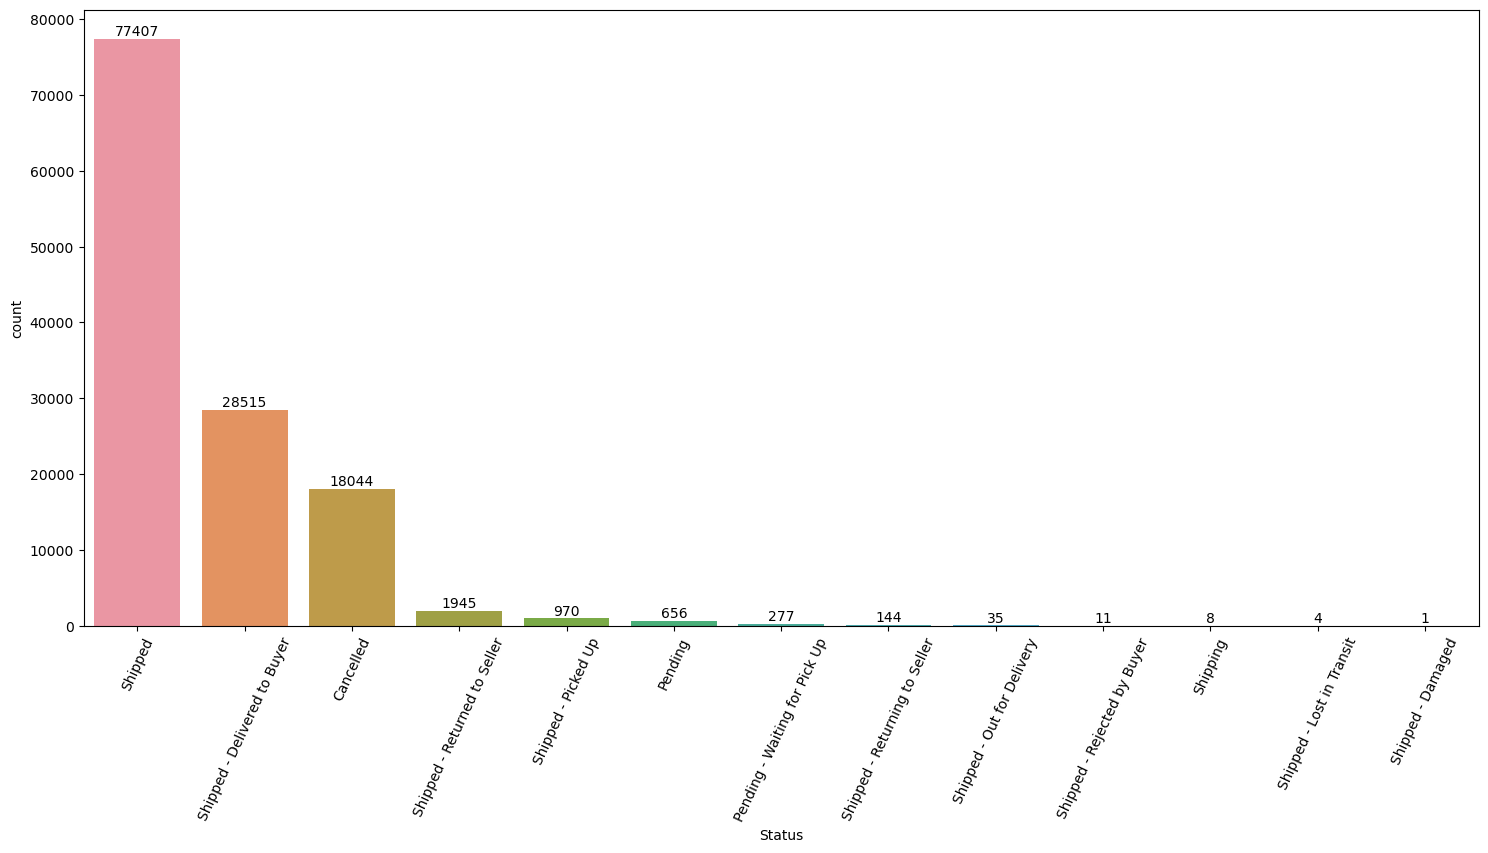

In [59]:
plt.figure(figsize=(18,8))
ax=sns.countplot(data=df,x="Status",order=df['Status'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=65)
plt.show()

In [60]:
total=df["Status"].count()
total

128017

In [61]:
df["Status"].value_counts()

Status
Shipped                          77407
Shipped - Delivered to Buyer     28515
Cancelled                        18044
Shipped - Returned to Seller      1945
Shipped - Picked Up                970
Pending                            656
Pending - Waiting for Pick Up      277
Shipped - Returning to Seller      144
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: count, dtype: int64

In [62]:
cancel=df["Status"].value_counts()["Cancelled"]
cancel

18044

In [63]:
cancelled_percentage=(cancel/total)*100
cancelled_percentage

14.095003007413078

In [64]:
returned=df["Status"].value_counts()["Shipped - Returned to Seller"]+df["Status"].value_counts()["Shipped - Returning to Seller"]+df["Status"].value_counts()["Shipped - Rejected by Buyer"]
returned

2100

In [65]:
returned_percentage=(returned/total)*100
returned_percentage

1.6404071334275916

### Only 14.095% order status are cancelled and  1.64% order status are returned to seller rest are shipped and delivered

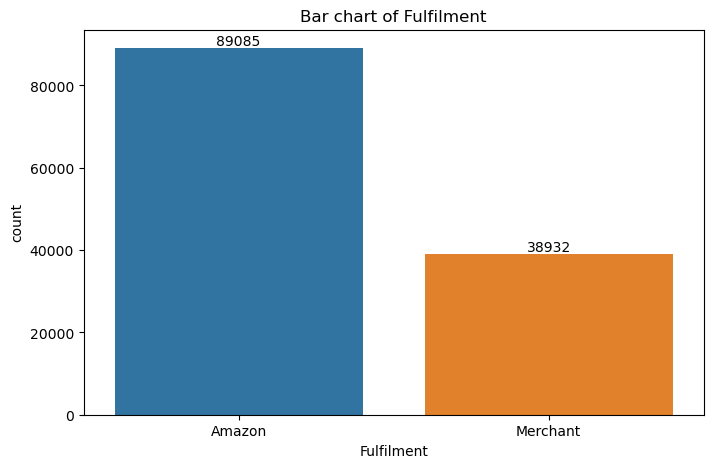

In [69]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df,x="Fulfilment",order=df['Fulfilment'].value_counts().index)
plt.title("Bar chart of Fulfilment")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

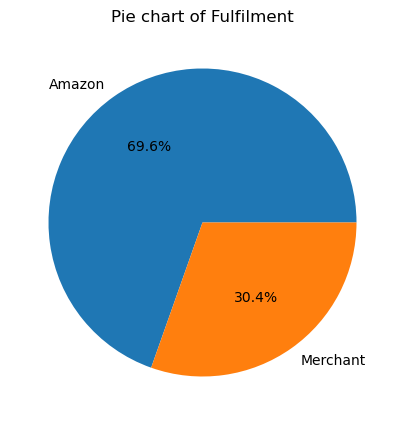

In [70]:
fulfilment_value=df['Fulfilment'].value_counts()
fig = plt.figure(figsize=(5, 5))
plt.pie(fulfilment_value, labels=fulfilment_value.index,autopct='%1.1f%%')
plt.title("Pie chart of Fulfilment")
plt.show()

#### Most of the(69.6%) Fulfilment are amazon

In [71]:
df["ship-service-level"].unique()

array(['Standard', 'Expedited'], dtype=object)

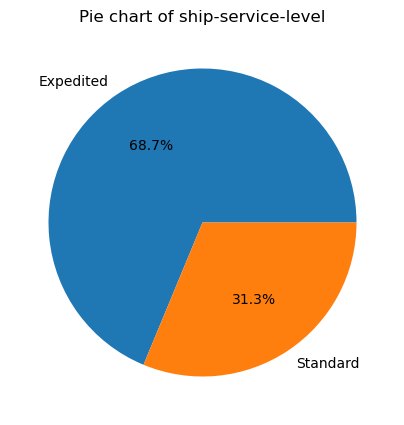

In [73]:
ssl_value=df['ship-service-level'].value_counts()
fig = plt.figure(figsize=(5, 5))
plt.pie(ssl_value, labels=ssl_value.index,autopct='%1.1f%%')
plt.title("Pie chart of ship-service-level")
plt.show()

In [74]:
df["Category"].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

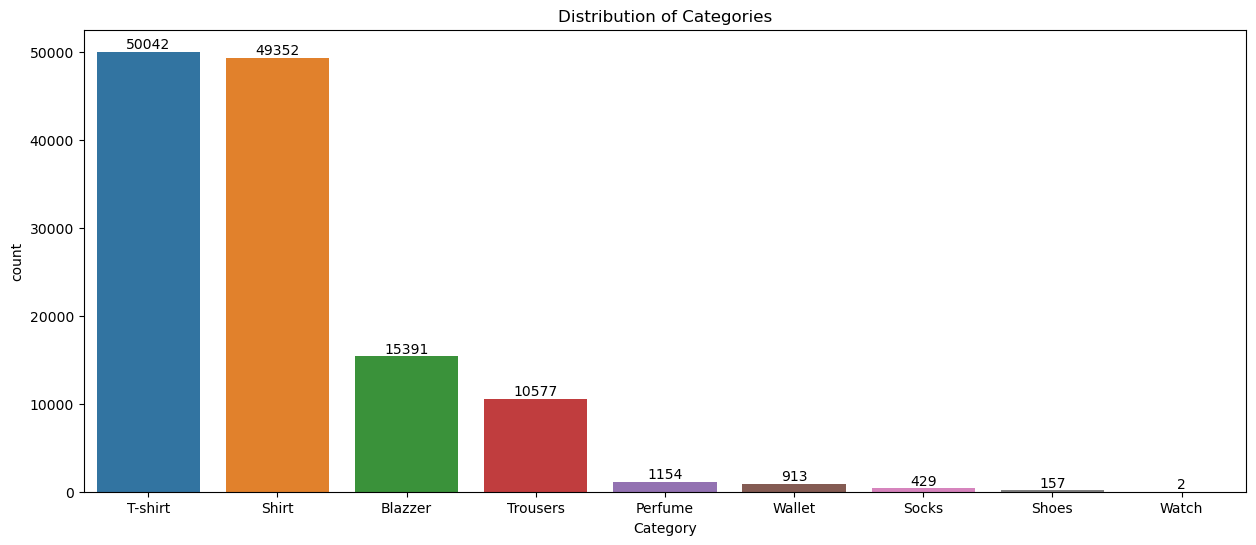

In [85]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x="Category",order=df['Category'].value_counts().index)
plt.title("Distribution of Categories")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### T-Shirts and Shirts have maximum sales

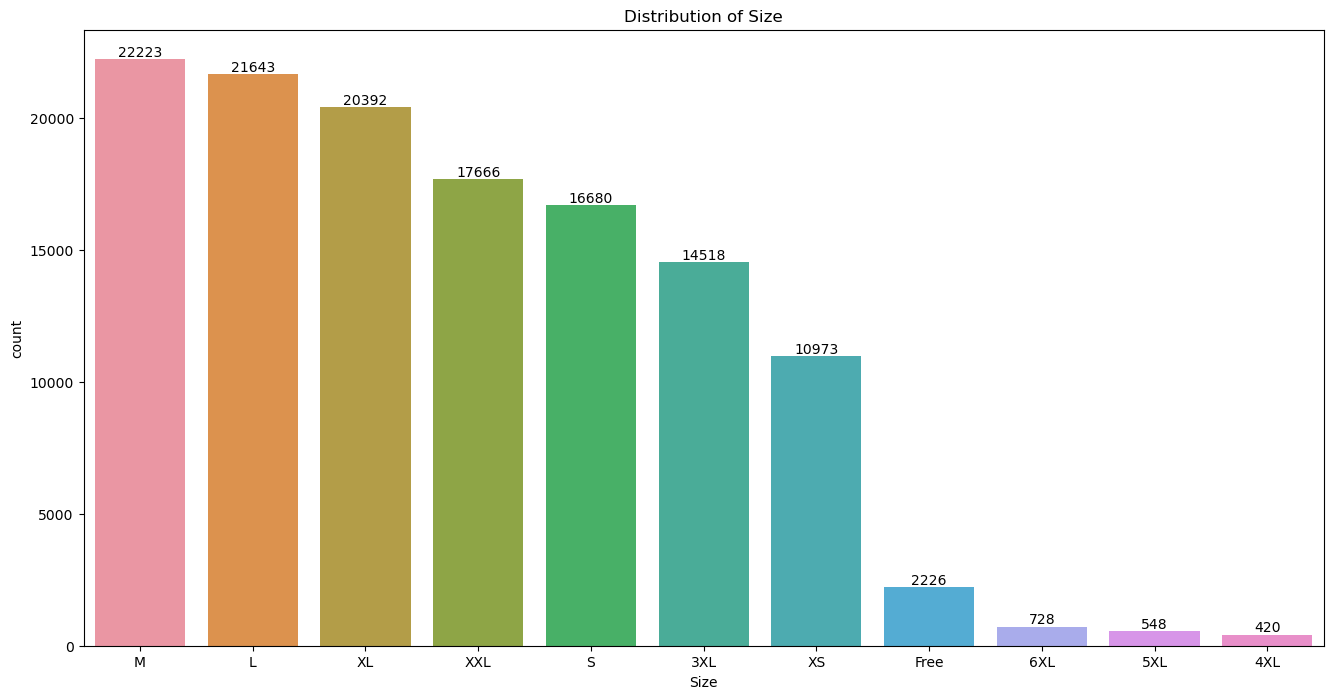

In [89]:
plt.figure(figsize=(16,8))
ax=sns.countplot(data=df,x="Size",order=df['Size'].value_counts().index)
plt.title("Distribution of Size")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Top selling sizes are- M, L, XL

In [77]:
df["Courier Status"].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

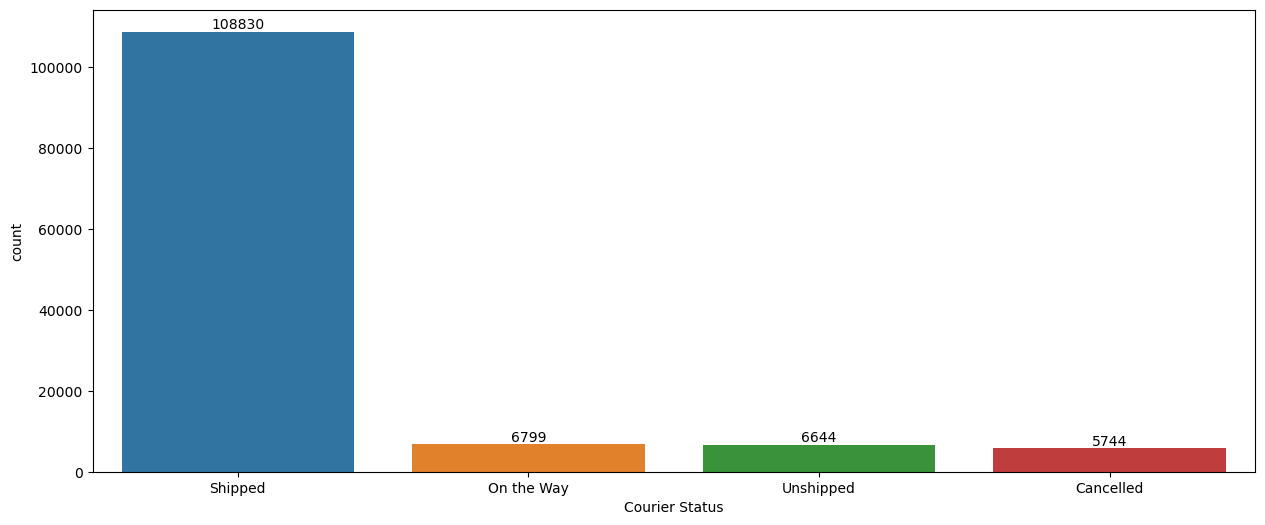

In [90]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x="Courier Status",order=df['Courier Status'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [79]:
df["Qty"].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4,  8], dtype=int64)

In [80]:
df[df["Qty"]==df["Qty"].max()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
938,S02-5278980-4327051,2022-04-30,Shipped,Amazon,Non-Amazon,Standard,Wallet,Free,Unshipped,15,INR,NaN,SURAT,GUJARAT,394210.0,IN,False,NaN


In [81]:
df["Qty"].value_counts()

Qty
1     115088
0      12543
2        339
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: count, dtype: int64

#### Maximum order quantity is -> 1

<Axes: xlabel='Amount', ylabel='Count'>

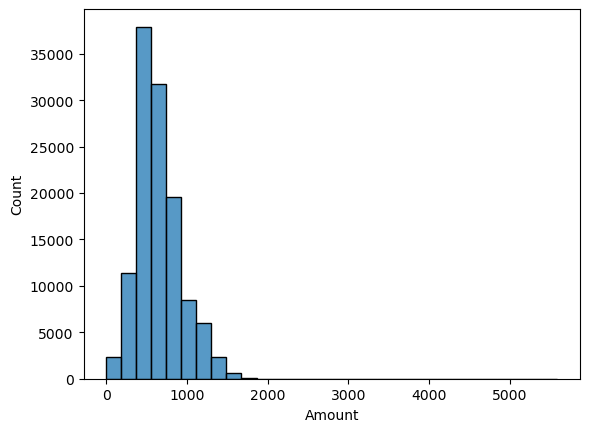

In [92]:
sns.histplot(df["Amount"],bins=30)

In [93]:
df[df["Amount"]>2000].shape[0]

54

#### Only 54 orders have price more than 2000 Ruppes

Text(0.5, 1.0, 'Distribution of Amount')

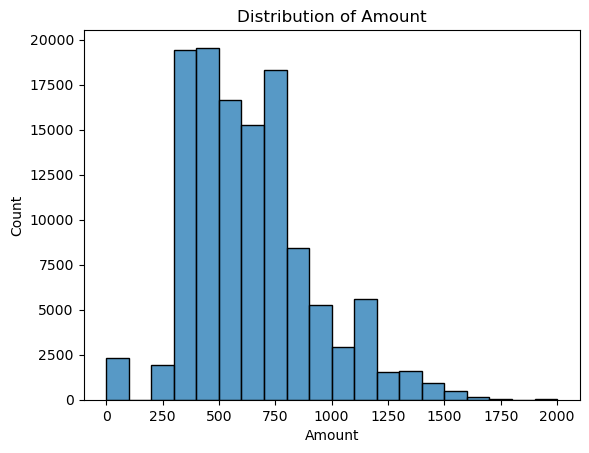

In [97]:
sns.histplot(df[df["Amount"]<2000]["Amount"],binwidth=100)
plt.title("Distribution of Amount")

#### Most of the orders price belongs between 300 to 1000

In [98]:
df["Amount"].max()

5584.0

#### Highest order amount is 5584 INR

In [99]:
df[df["Amount"]==df["Amount"].max()]                  #Detail of highest amount order item

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
42040,402-5239558-4281957,2022-04-05,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,8,INR,5584.0,GUNTUR,ANDHRA PRADESH,522007.0,IN,False,NaN


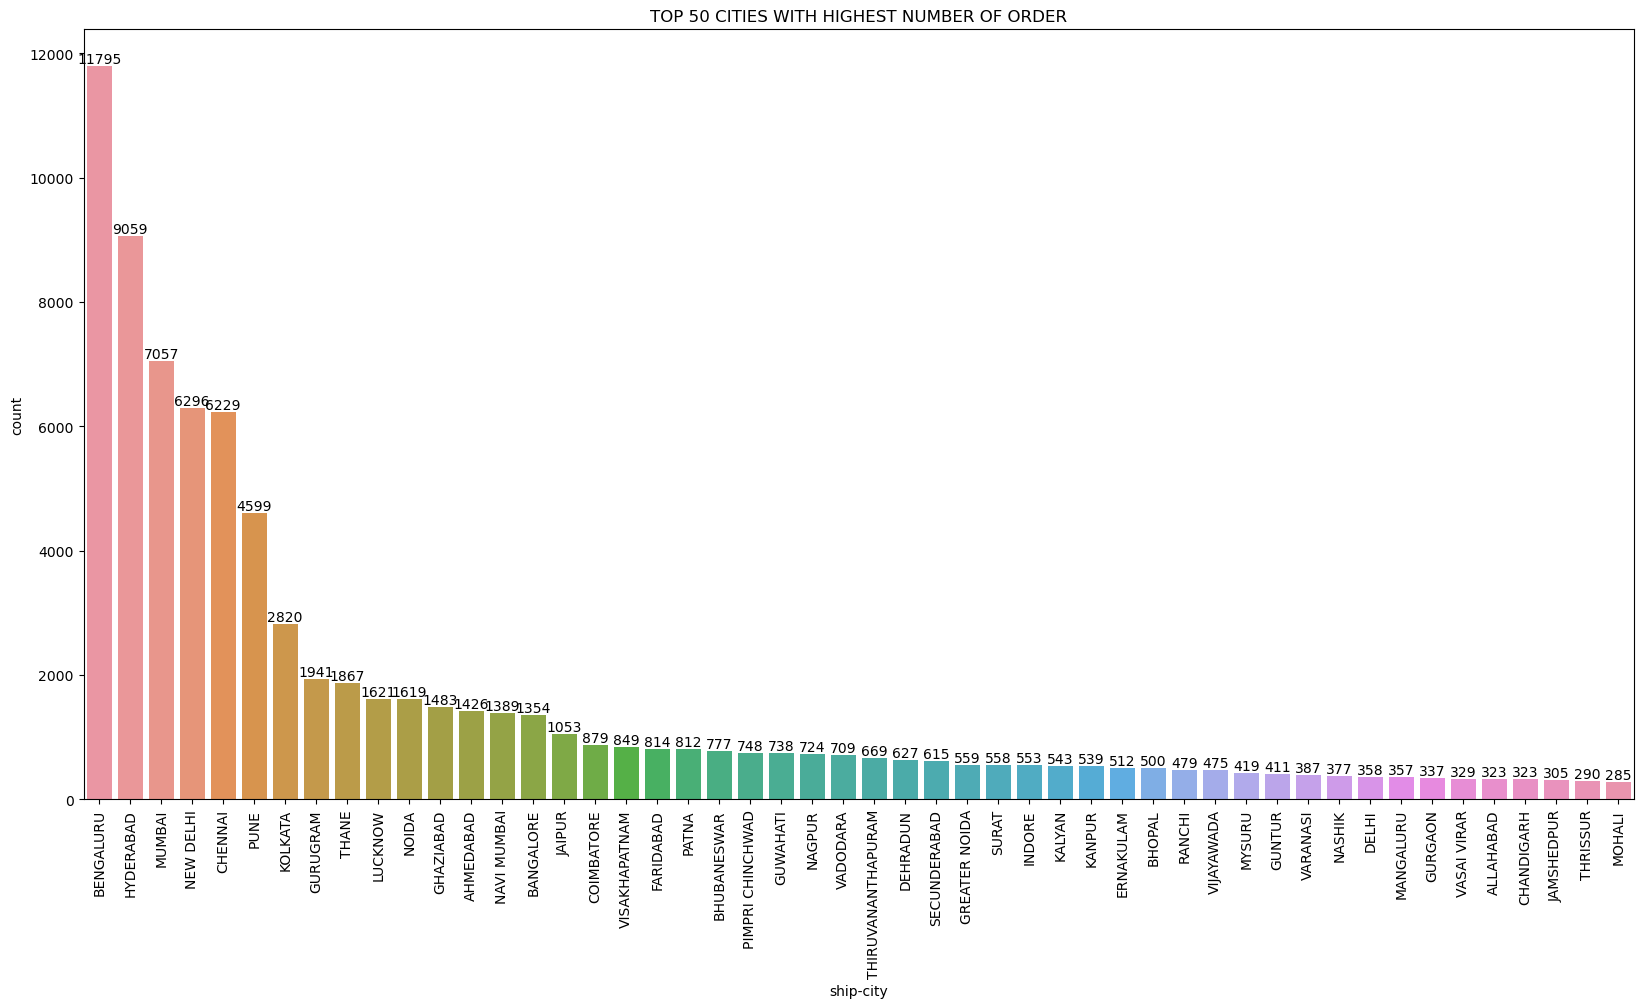

In [101]:
plt.figure(figsize=(20,10))
ax=sns.countplot(data=df,x="ship-city",order=df['ship-city'].value_counts().iloc[:50].index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.title("TOP 50 CITIES WITH HIGHEST NUMBER OF ORDER")
plt.show()

#### Most of the buyers are from Bengaluru

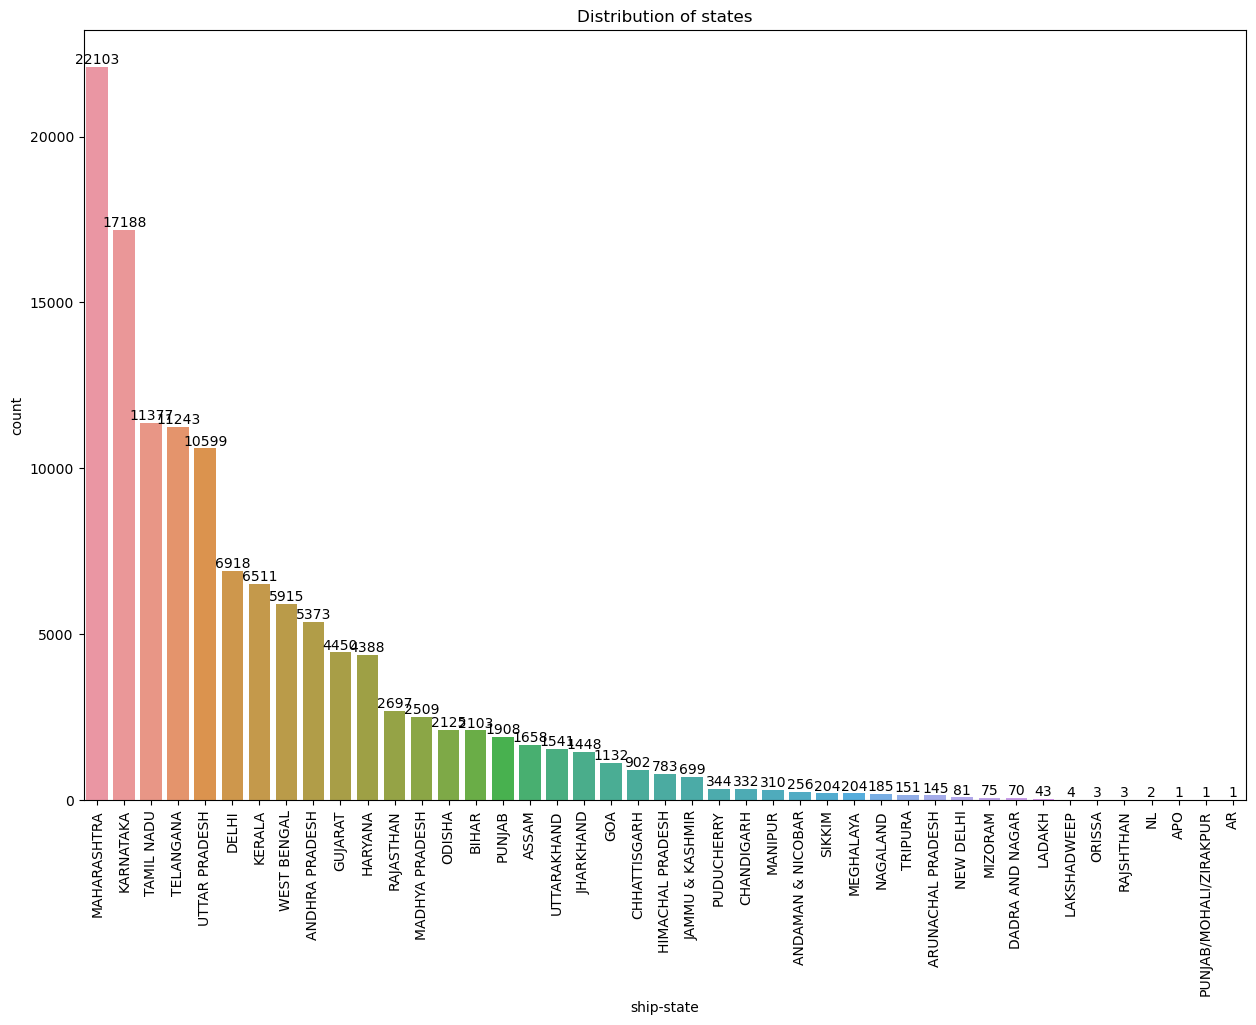

In [153]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df,x="ship-state",order=df['ship-state'].value_counts().index)
plt.title("Distribution of states")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

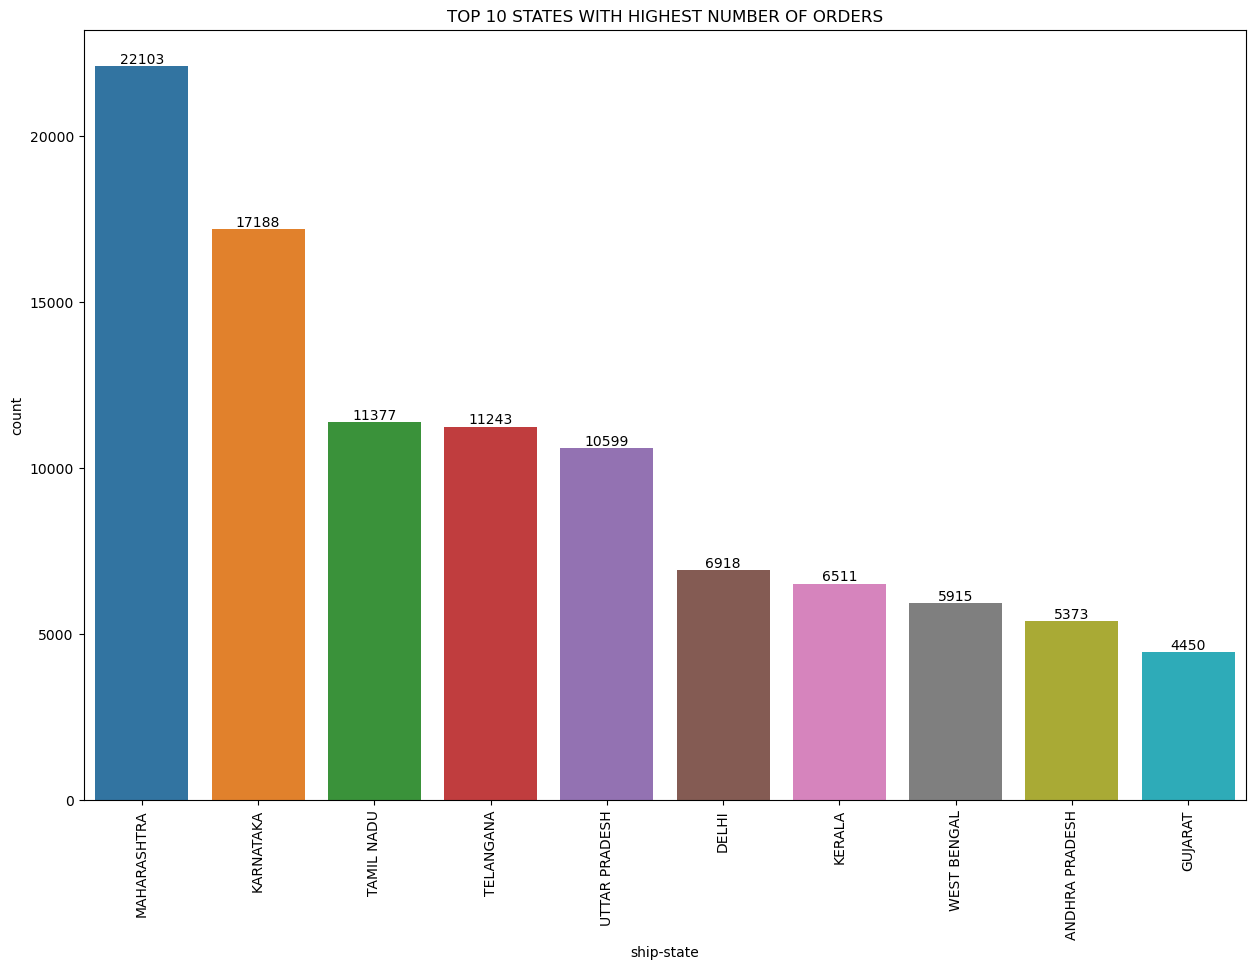

In [107]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df,x="ship-state",order=df['ship-state'].value_counts().iloc[:10].index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.title("TOP 10 STATES WITH HIGHEST NUMBER OF ORDERS")
plt.show()

#### Most of the buyers are from State Maharashtra

In [105]:
df["ship-postal-code"].nunique()

9454

<Axes: title={'center': 'B2B'}, ylabel='count'>

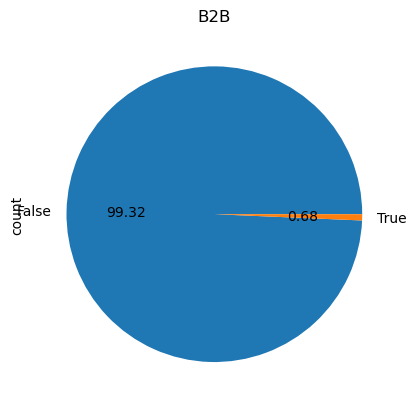

In [106]:
df['B2B'].value_counts().plot(kind='pie',autopct='%.2f',title="B2B")

####  Maximum i.e. 99.32% of buyers are retailers and 0.68% are B2B buyers

In [108]:
df["Sales Channel"].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [109]:
df["Sales Channel"].value_counts()

Sales Channel
Amazon.in     127893
Non-Amazon       124
Name: count, dtype: int64

<Axes: title={'center': 'Sales Channel'}, ylabel='count'>

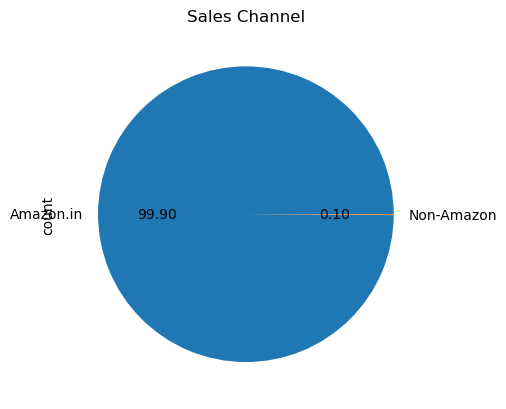

In [111]:
df['Sales Channel'].value_counts().plot(kind='pie',autopct='%.2f',title="Sales Channel")

## Multivariate Analysis- Analysis between two or more column

In [112]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


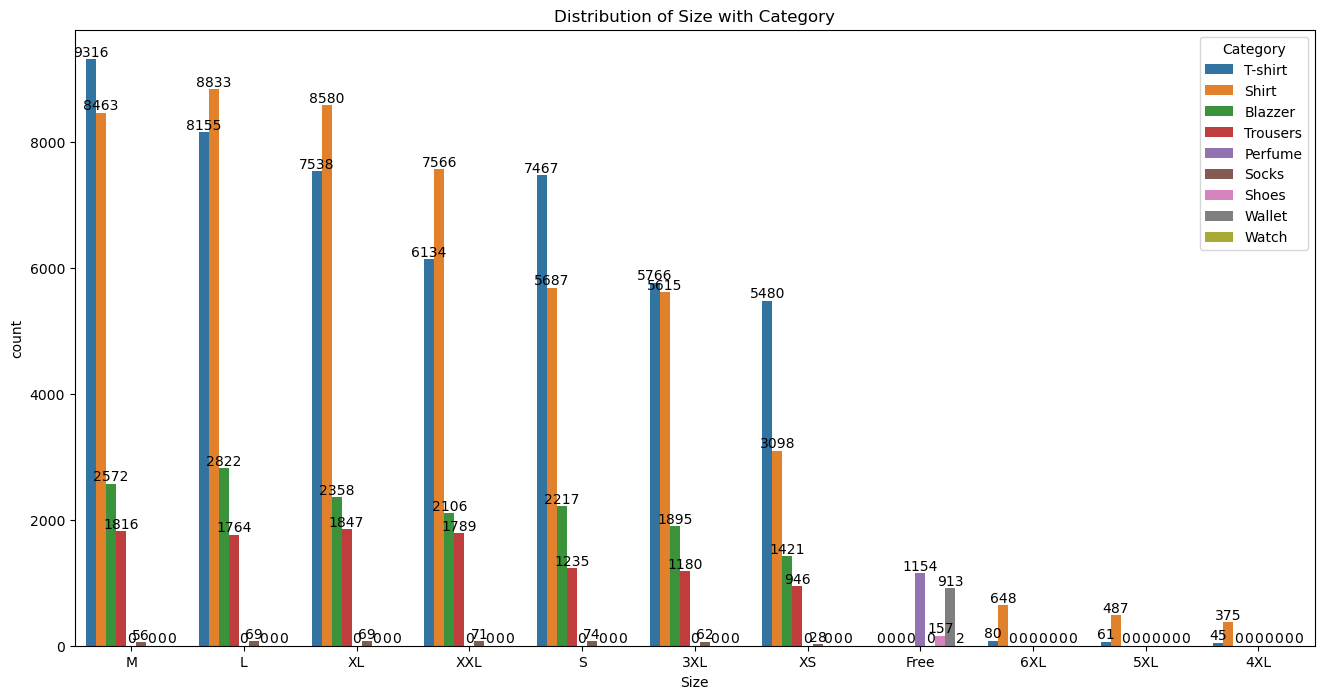

In [114]:
plt.figure(figsize=(16,8))
ax=sns.countplot(data=df,x="Size",order=df['Size'].value_counts().index,hue="Category")
plt.title("Distribution of Size with Category")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

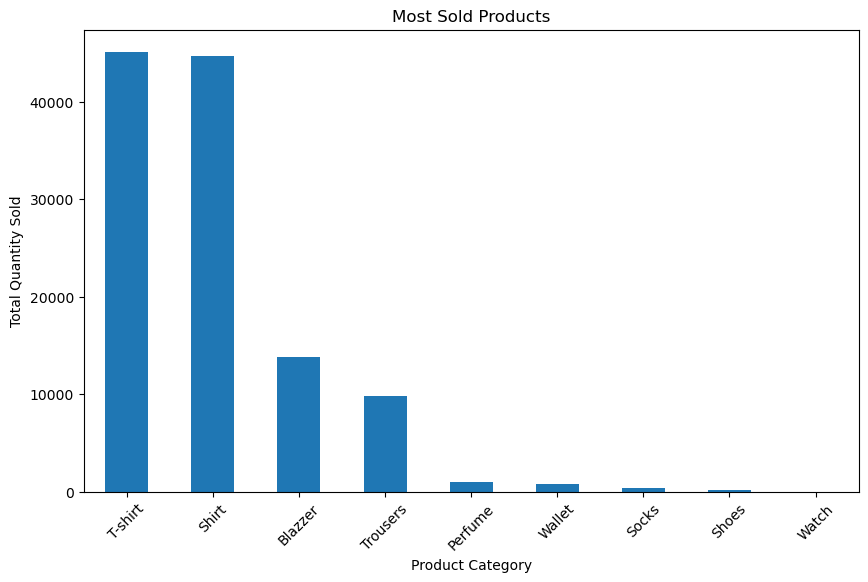

In [120]:
product_sales = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.title('Most Sold Products')
plt.xticks(rotation=45)
plt.show()

In [121]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,20031
5,L,19581
8,XL,18509
10,XXL,16154
7,S,14982
0,3XL,13277
9,XS,9789
4,Free,2046
3,6XL,680
2,5XL,512


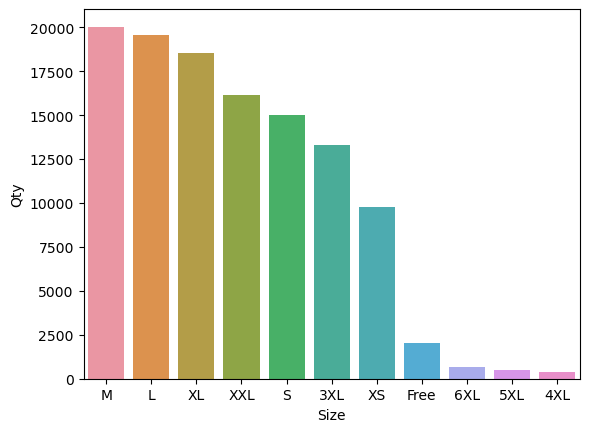

In [122]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(x='Size',y='Qty', data=S_Qty)
plt.show()

#### From above Graph we can see that most of the Qty buys M-Size in the sales

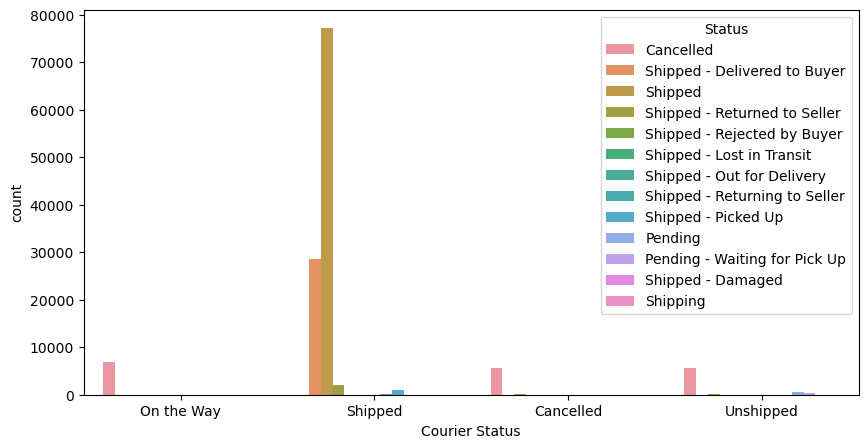

In [123]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')
plt.show()

#### The majority of the orders are shipped through the courier

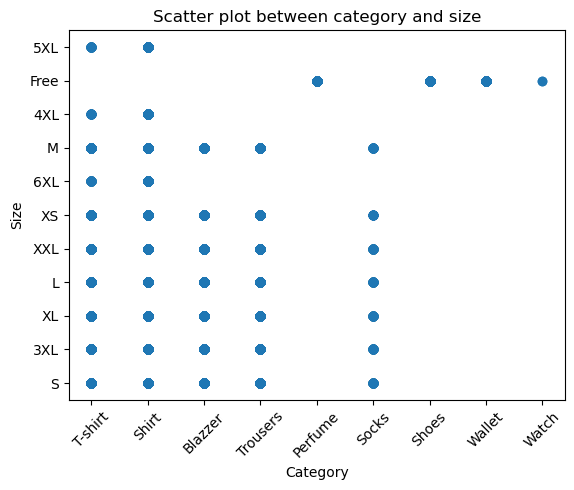

In [124]:
plt.scatter(df['Category'], df['Size'])
plt.xlabel('Category')  
plt.ylabel('Size') 
plt.title("Scatter plot between category and size")
plt.xticks(rotation=45)
plt.show()

## -----Analysis of cancelled orders-----

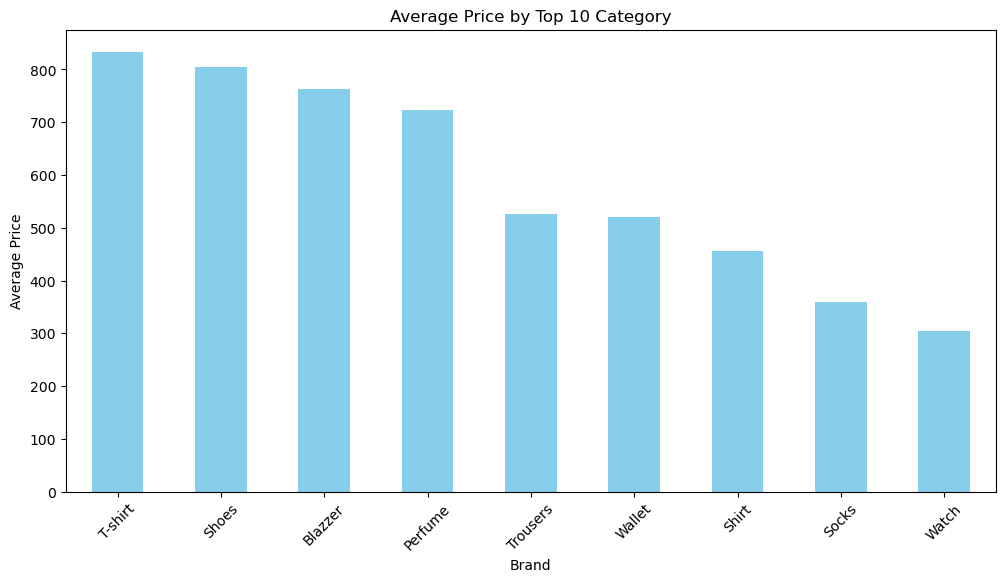

In [126]:
average_price_by_brand = df.groupby('Category')['Amount'].mean()

top_brands = average_price_by_brand.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Top 10 Category')
plt.xticks(rotation=45)
plt.show()

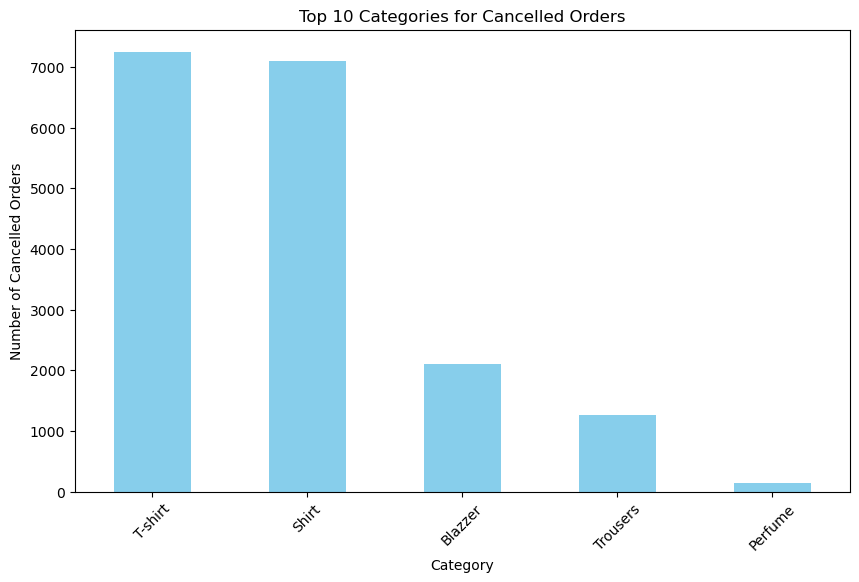

In [127]:
cancelled_orders = df[df['Status'] == 'Cancelled']
cancelled_category_counts = cancelled_orders['Category'].value_counts().head(5)
plt.figure(figsize=(10, 6))
cancelled_category_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories for Cancelled Orders')
plt.xlabel('Category')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45)
plt.show()

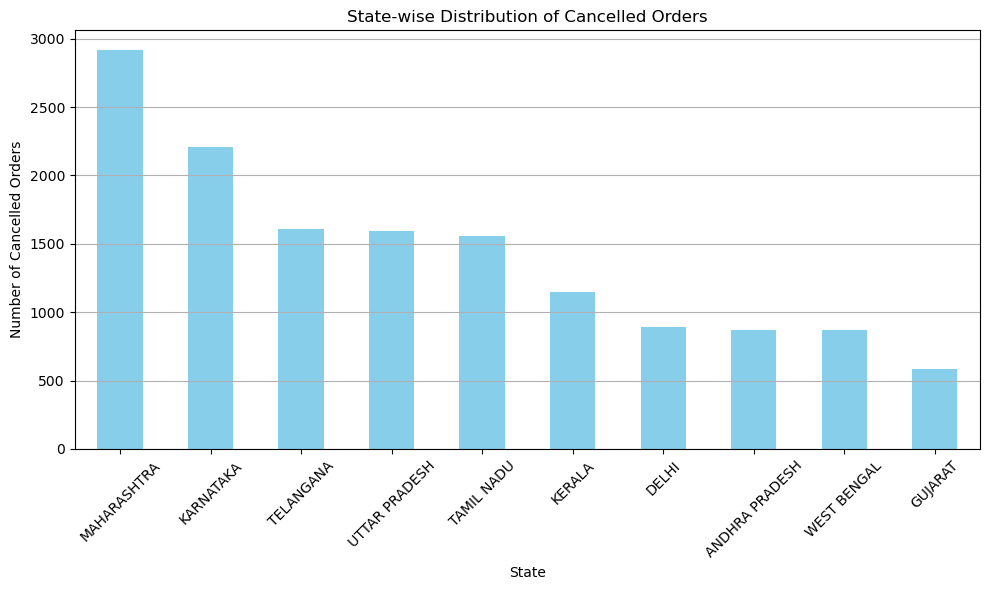

In [128]:
cancelled_orders = df[df['Status'] == 'Cancelled']

cancelled_orders_by_state = cancelled_orders['ship-state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
cancelled_orders_by_state.plot(kind='bar', color='skyblue')
plt.title('State-wise Distribution of Cancelled Orders')
plt.xlabel('State')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

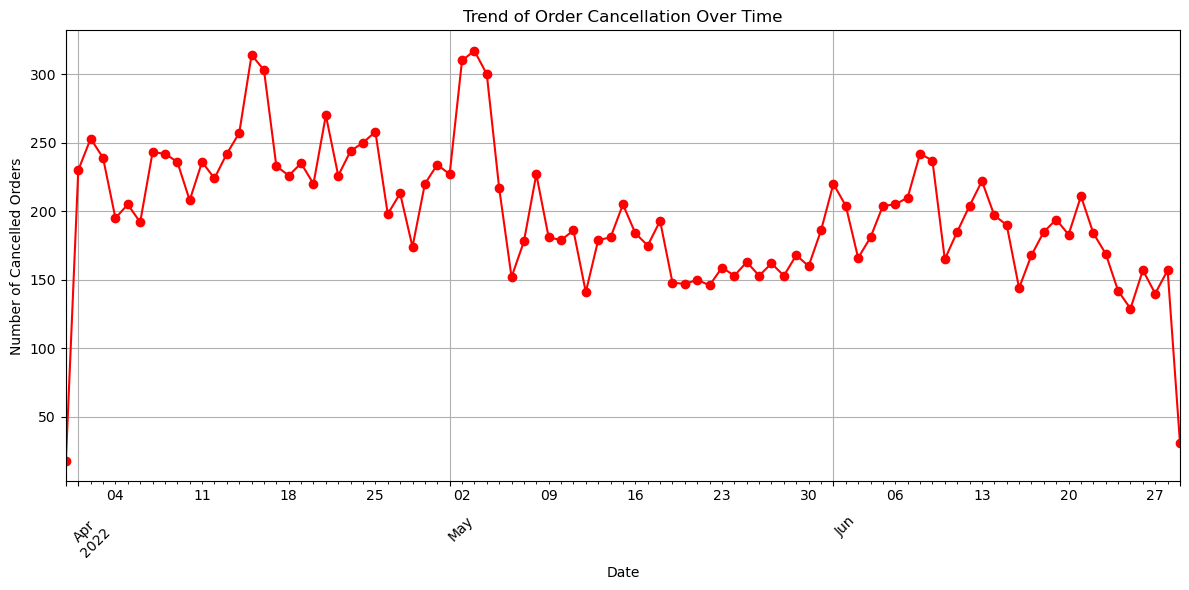

In [129]:
cancelled_orders = df[df['Status'] == 'Cancelled']
cancelled_orders_by_date = cancelled_orders.groupby('Date').size()
plt.figure(figsize=(12, 6))
cancelled_orders_by_date.plot(color='red', marker='o', linestyle='-')
plt.title('Trend of Order Cancellation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

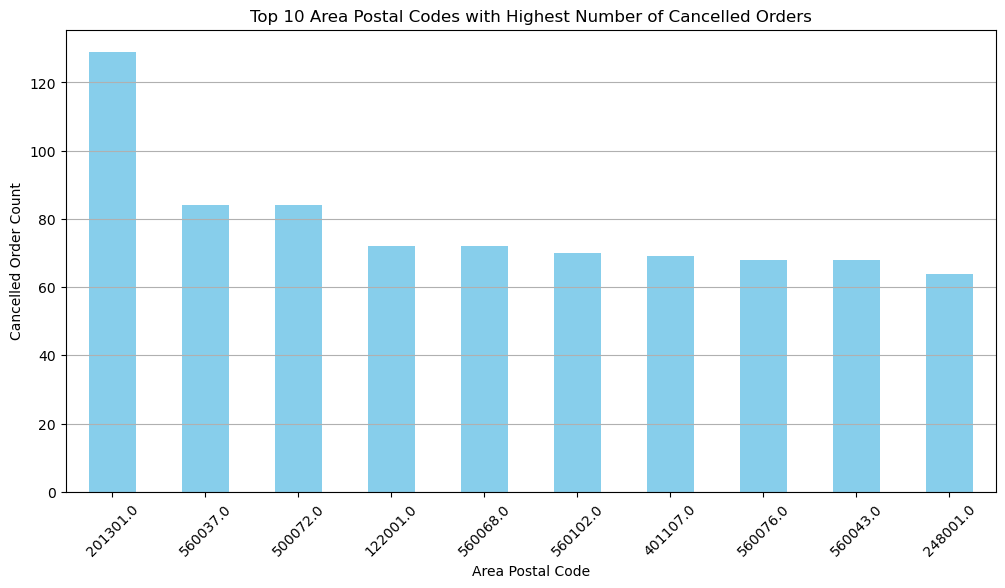

In [130]:
cancelled_orders_count = cancelled_orders['ship-postal-code'].value_counts().head(10)

plt.figure(figsize=(12, 6))
cancelled_orders_count.plot(kind='bar', color='skyblue')
plt.xlabel('Area Postal Code')
plt.ylabel('Cancelled Order Count')
plt.title('Top 10 Area Postal Codes with Highest Number of Cancelled Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## ------- Analysing the trend of sales over the time -------

In [131]:
df['month'] = pd.DatetimeIndex(df.Date).month
df['day'] = pd.DatetimeIndex(df.Date).day
df['weekday'] = pd.DatetimeIndex(df.Date).day_name()

In [132]:
df=df.sort_values(by="Date").reset_index(drop=True)

In [133]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,month,day,weekday
0,408-9483921-6621140,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,...,1799.00,KOLKATA,WEST BENGAL,700094.0,IN,False,NaN,3,31,Thursday
1,403-4108307-0229121,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,...,542.00,HYDERABAD,TELANGANA,500024.0,IN,False,NaN,3,31,Thursday
2,407-0339645-8708348,2022-03-31,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,...,724.76,VADAKARA,KERALA,673101.0,IN,False,Easy Ship,3,31,Thursday
3,171-1556000-8993931,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,...,NaN,KOLKATA,WEST BENGAL,700029.0,IN,False,NaN,3,31,Thursday
4,403-9536559-5724368,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,...,NaN,HYDERABAD,TELANGANA,500020.0,IN,False,NaN,3,31,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128012,405-1821263-0775503,2022-06-29,Pending,Amazon,Amazon.in,Expedited,T-shirt,XL,Unshipped,1,...,668.00,BANGALORE,KARNATAKA,560085.0,IN,False,NaN,6,29,Wednesday
128013,406-6133797-2628332,2022-06-29,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,...,612.00,PATNA,BIHAR,800002.0,IN,False,NaN,6,29,Wednesday
128014,403-5461377-2549911,2022-06-29,Pending,Amazon,Amazon.in,Expedited,Trousers,XL,Unshipped,1,...,423.00,BENGALURU,KARNATAKA,560026.0,IN,False,NaN,6,29,Wednesday
128015,403-7681331-8953128,2022-06-29,Pending,Merchant,Amazon.in,Standard,Shirt,XL,Unshipped,1,...,301.00,LONI,UTTAR PRADESH,201102.0,IN,False,Easy Ship,6,29,Wednesday


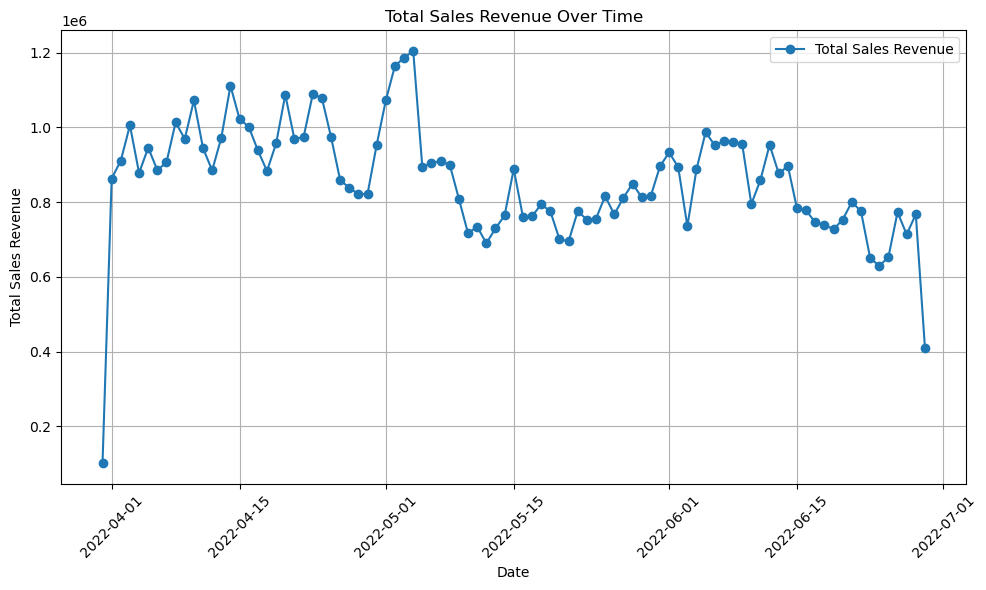

In [134]:
daily_sales = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', label='Total Sales Revenue')
plt.title('Total Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [135]:
monthly_df=df.groupby('month')[['Qty','Amount']].sum()
print("Monthly Sales")
monthly_df

Monthly Sales


,Qty,Amount
month,,
3,156,101683.85
4,43847,28627458.79
5,37811,26105818.34
6,34139,23344842.90


In [136]:
df[df["month"]==6]["Date"].nunique()

29

In [137]:
df[df["month"]==4]["Date"].nunique()

30

In [138]:
df[df["month"]==5]["Date"].nunique()

31

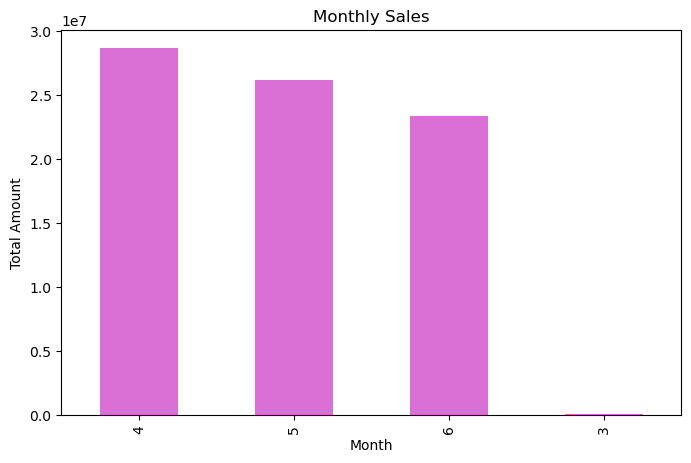

In [147]:
monthly_sales = df.groupby('month')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar',color="orchid")
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Monthly Sales')
plt.show()

#### May month has highest sale

In [140]:
weekday_sales = df.groupby('weekday')['Amount'].sum().sort_values(ascending=False)

In [141]:
weekday_sales 

weekday
Sunday       11983539.39
Tuesday      11388563.92
Saturday     11279327.90
Monday       11279219.51
Wednesday    11192741.68
Friday       10745150.26
Thursday     10311261.22
Name: Amount, dtype: float64

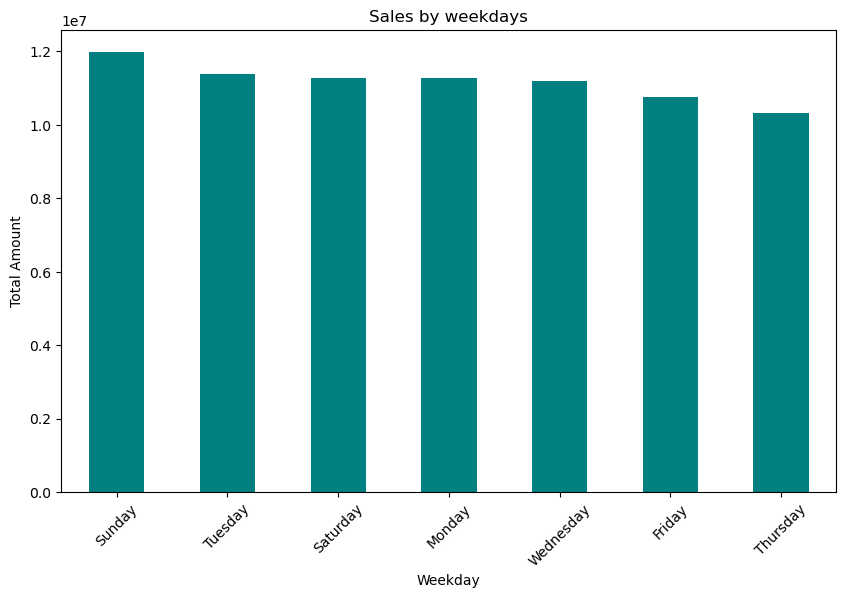

In [146]:
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color="teal")
plt.xlabel('Weekday')
plt.ylabel('Total Amount')
plt.title('Sales by weekdays')
plt.xticks(rotation=45)
plt.show()

#### Sales are slightly high in Sunday

In [154]:
df1=pd.read_csv("Amazon Sale Report.csv")  

In [155]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')                # Analysis report using Pandas Profiling

C:\Users\Sweety\AppData\Local\Temp\ipykernel_2552\2744176484.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
C:\Users\Sweety\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]